In [257]:
import re
import time
import math
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

 

# Predicting Housing Prices

 

In [258]:
# Load data
housing = pd.read_csv('C:/Users/keith/Desktop/Thinkful/Melbourne_housing_FULL.csv',encoding = "ISO-8859-1")

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows


In [259]:
housing.shape

(34857, 21)

In [260]:
housing.head(100)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [261]:
housing[housing.Suburb=='Abbotsford'].Suburb.value_counts()

Abbotsford    137
Name: Suburb, dtype: int64

# Data Description

 

In [262]:
housing.columns 

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# Data cleaning

In [263]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [264]:
# convert categorical variables to proper data type
housing['Suburb'] = housing['Suburb'].astype('category')
housing['Address'] = housing['Address'].astype('category')
housing['Type'] = housing['Type'].astype('category')
housing['Method'] = housing['Method'].astype('category')
housing['SellerG'] = housing['SellerG'].astype('category')
housing['Postcode'] = housing['Postcode'].astype('category')
housing['Regionname'] = housing['Regionname'].astype('category')
housing['Propertycount'] = housing['Propertycount'].astype('category') 
housing['CouncilArea'] = housing['CouncilArea'].astype('category') 

In [265]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null category
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null category
dtypes: category(9), float64(10), int64(1), o

In [266]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

There are many columns with missing values. Let's take a look at the ones with the fewest null values

In [267]:
housing[housing.Distance.isnull()==True]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This row contains many of the missing values from the columns missing a single value. It will not offer much value to impute every column for this row so we will just drop it.

In [268]:
housing.drop(29483,0,inplace=True)
housing.reset_index(drop=True, inplace=True)

In [269]:
print(housing.sort_values(by='Bathroom').Bathroom.unique(),'\n')
print(housing.sort_values(by='Rooms').Rooms.unique(),'\n')
print(housing.sort_values(by='Bedroom2').Bedroom2.unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 12. nan] 

[ 1  2  3  4  5  6  7  8  9 10 12 16] 

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 12. 16. 20. 30. nan]


There should not be home with 0 bedrooms or 0 bathrooms it is also unlikely that they have more bathrooms that bedrooms. Let's look at how many home are reported with these attributes and also the null values of these columns.

In [270]:
housing.groupby('Regionname').describe().transpose()

Regionname          Eastern Metropolitan  Eastern Victoria  \
Bathroom     count          3.403000e+03      1.890000e+02   
             mean           1.789597e+00      1.862434e+00   
             std            7.631566e-01      7.452805e-01   
             min            0.000000e+00      1.000000e+00   
             25%            1.000000e+00      1.000000e+00   
             50%            2.000000e+00      2.000000e+00   
             75%            2.000000e+00      2.000000e+00   
             max            8.000000e+00      6.000000e+00   
Bedroom2     count          3.404000e+03      1.890000e+02   
             mean           3.448002e+00      3.555556e+00   
             std            9.395162e-01      7.672369e-01   
             min            0.000000e+00      1.000000e+00   
             25%            3.000000e+00      3.000000e+00   
             50%            3.000000e+00      3.000000e+00   
             75%            4.000000e+00      4.000000e+00   
             max            1.600000e+01      8.000000e+00   
BuildingArea count          1.616000e+03      9.400000e+01   
             mean           1.835480e+02      1.745186e+02   
             std            2.185020e+02      9.784141e+01   
             min            0.000000e+00      0.000000e+00   
             25%            1.200000e+02      1.090000e+02   
             50%            1.570000e+02      1.570000e+02   
             75%            2.120000e+02      2.082500e+02   
             max            6.791000e+03      6.600000e+02   
Car          count          3.360000e+03      1.850000e+02   
             mean           1.871726e+00      2.102703e+00   
             std            9.355081e-01      1.120580e+00   
             min            0.000000e+00      0.000000e+00   
             25%            1.000000e+00      2.000000e+00   
             50%            2.000000e+00      2.000000e+00   
             75%            2.000000e+00      2.000000e+00   
             max            1.800000e+01      8.000000e+00   
Distance     count          4.377000e+03      2.280000e+02   
             mean           1.463589e+01      3.402149e+01   
             std            4.491058e+00      6.789641e+00   
             min            7.800000e+00      2.520000e+01   
             25%            1.140000e+01      2.650000e+01   
             50%            1.420000e+01      3.520000e+01   
             75%            1.670000e+01      3.900000e+01   
             max            2.700000e+01      4.730000e+01   
Landsize     count          2.865000e+03      1.440000e+02   
             mean           6.864806e+02      2.314882e+03   
             std            5.265002e+02      8.366175e+03   
             min            0.000000e+00      0.000000e+00   
             25%            5.430000e+02      6.212500e+02   
             50%            6.660000e+02      8.555000e+02   
             75%            7.800000e+02      9.687500e+02   
             max            1.373300e+04      7.600000e+04   
Lattitude    count          3.419000e+03      1.900000e+02   
             mean          -3.779812e+01     -3.793539e+01   
             std            5.078224e-02      1.498196e-01   
             min           -3.790401e+01     -3.816439e+01   
             25%           -3.783506e+01     -3.806820e+01   
             50%           -3.779140e+01     -3.800390e+01   
             75%           -3.775870e+01     -3.777869e+01   
             max           -3.768467e+01     -3.772460e+01   
Longtitude   count          3.419000e+03      1.900000e+02   
             mean           1.451449e+02      1.453288e+02   
             std            7.118562e-02      7.962792e-02   
             min            1.450287e+02      1.451423e+02   
             25%            1.450913e+02      1.453098e+02   
             50%            1.451382e+02      1.453310e+02   
             75%            1.451842e+02      1.453593e+02   
             max            1.45

In [271]:
# count of zero beds and zero baths
print(housing[housing.Bathroom==0].Bathroom.value_counts(),'\n')
print(housing[housing.Bedroom2==0].Bedroom2.value_counts())

0.0    46
Name: Bathroom, dtype: int64 

0.0    17
Name: Bedroom2, dtype: int64


In [272]:
print('null baths',housing.Bathroom.isnull().sum(),'\n')
print('null beds',housing.Bedroom2.isnull().sum())

null baths 8225 

null beds 8216


In [273]:
# filling na Regionname using corresponding Suburbs names 
for i in housing.Suburb.index:
    housing.loc[i,'Regionname']=housing[housing.Suburb==housing.Suburb[i]].Regionname.unique()[0]

In [274]:
# filling na values and unlikely bathroom issues

for index in housing[housing.Bathroom>6].Bathroom.index:     
        housing.loc[index,'Bathroom']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Bathroom>0].Bathroom.mean())

for index in housing[housing.Bathroom.isnull()==True].Bathroom.index:     
        housing.loc[index,'Bathroom']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Bathroom>0].Bathroom.mean())
        
for index in housing[housing.Bathroom==0].Bathroom.index:     
        housing.loc[index,'Bathroom']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Bathroom>0].Bathroom.mean())

for index in housing[housing.Bedroom2.isnull()==True].Bedroom2.index:     
        housing.loc[index,'Bedroom2']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Bedroom2>0].Bedroom2.mean())
        
for index in housing[housing.Bedroom2==0].Bedroom2.index:     
        housing.loc[index,'Bedroom2']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Bedroom2>0].Bedroom2.mean())
       

In [275]:
for index in housing[housing.Bathroom>6].Bathroom.index:     
        housing.loc[index,'Bathroom']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Bathroom>0].Bathroom.mean())


In [276]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car               8727
Landsize         11809
BuildingArea     21114
YearBuilt        19305
CouncilArea          2
Lattitude         7975
Longtitude        7975
Regionname           0
Propertycount        2
dtype: int64

In [ ]:
housing[housing.Bedroom2.isnull()==True]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [ ]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car               8727
Landsize         11809
BuildingArea     21114
YearBuilt        19305
CouncilArea          2
Lattitude         7975
Longtitude        7975
Regionname           0
Propertycount        2
dtype: int64

In [ ]:
# filling na and unlikely zero values with the mean of the values in the corresponding regions


for index in housing[housing.Price.isnull()==True].Price.index:     
        housing.loc[index,'Price']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Price>0].Price.mean())
        
for index in housing[housing.Price==0].Price.index:     
        housing.loc[index,'Price']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Price>0].Price.mean())

for index in housing[housing.Landsize.isnull()==True].Landsize.index:     
        housing.loc[index,'Landsize']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Landsize>0].Landsize.mean())
        
for index in housing[housing.Landsize==0].Landsize.index:     
        housing.loc[index,'Landsize']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].Landsize>0].Landsize.mean())


for index in housing[housing.BuildingArea.isnull()==True].BuildingArea.index:     
        housing.loc[index,'BuildingArea']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].BuildingArea>0].BuildingArea.mean())
        
for index in housing[housing.BuildingArea<50].BuildingArea.index:     
        housing.loc[index,'BuildingArea']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].BuildingArea>0].BuildingArea.mean())

In [ ]:
print('null baths',housing.Bathroom.isnull().sum(),'\n')
print('null beds',housing.Bedroom2.isnull().sum())

In [ ]:
housing.isnull().sum()

In [ ]:
print(housing.YearBuilt.value_counts().sort_index().head(5),'\n')
print(housing.YearBuilt.value_counts().sort_index().tail(5))

The US didn't exist in 1196 so most likely there wasn't a home built in that year. Also, this dataset is from 2018 so those 'YearBuilt' dates must be converted.

In [ ]:
for index in housing[housing.YearBuilt.isnull()==True].YearBuilt.index:     
        housing.loc[index,'YearBuilt']=np.round(housing[housing.Regionname==housing.Regionname[index]][(housing[housing.Regionname==housing.Regionname[index]].YearBuilt>=1800) & 
                                                                                              (housing[housing.Regionname==housing.Regionname[index]].YearBuilt<2018)].YearBuilt.mean())
        
for index in housing[housing.YearBuilt<1800.0].YearBuilt.index:     
        housing.loc[index,'YearBuilt']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].YearBuilt>0].YearBuilt.mean())
for index in housing[housing.YearBuilt>2018.0].YearBuilt.index:     
        housing.loc[index,'YearBuilt']=np.round(housing[housing.Regionname==housing.Regionname[index]][housing[housing.Regionname==housing.Regionname[index]].YearBuilt>0].YearBuilt.mean())        

In [ ]:
for index in housing[housing.Car.isnull()==True].Car.index:     
         housing.loc[index,'Car']=np.round(housing[housing.Regionname==housing.Regionname[index]][(housing[housing.Regionname==housing.Regionname[index]].Car<11)].Car.mean())
        
for index in housing[housing.Car>11].Car.index:     
        housing.loc[index,'Car']=np.round(housing[housing.Regionname==housing.Regionname[index]].Car.mean())
        

In [ ]:
housing.Car.value_counts().sort_index()

In [ ]:
housing[housing.CouncilArea.isnull()==True]

In [ ]:
print(housing[housing.Suburb=='Footscray'][:1])
print(housing[housing.Suburb=='Camberwell'][:1])

In [ ]:
housing.loc[18523,'Propertycount']=7570.0
housing.loc[26888,'Propertycount']=8920.0
housing.loc[18523,'CouncilArea']="Maribyrnong City Council"
housing.loc[26888,'CouncilArea']="Boroondara City Council"

In [ ]:
housing.isnull().sum()

In [ ]:
#housing.to_csv('C:/Users/keith/Desktop/Thinkful/export_dataframe.csv',index=True)

In [ ]:
#housing = pd.read_csv('C:/Users/keith/Desktop/Thinkful/export_dataframe.csv',encoding = "ISO-8859-1")

In [ ]:
housing['Date'] = pd.to_datetime(housing.Date)

 # Exploratory Data Analysis
 

In [ ]:
housing.columns

In [ ]:
 housing.head()

In [ ]:
# Summary statistics
housing.describe()

There are some strange anomolies that need to be investigated by just looking at the summary statistics. There are huge outliers in landsize, building area and price. 

In [ ]:
plt.hist(np.log(housing[housing.Landsize<146699].Landsize),alpha=.5)
plt.show()
plt.hist(housing.Log_landSize,alpha=.5)
plt.show()
plt.hist(housing.boxc_landSize,alpha=.5)
plt.show()

In [ ]:
housing.sort_values(by='BuildingArea').tail(10)

In [ ]:
plt.hist(np.log(housing[housing.BuildingArea<1000].BuildingArea),alpha=.5)
plt.show()
plt.hist(housing.Log_buildingArea,alpha=.5)
plt.show()
plt.hist(housing.boxc_buildingArea,alpha=.5)
plt.show()

In [ ]:
housing.sort_values(by='Landsize').tail(10)

In [ ]:
housing.drop([26868,18036],0) 
housing.reset_index(drop=True, inplace=True)

In [ ]:
from scipy.stats import boxcox

Landsize_boxcox,_ = boxcox(housing["Landsize"])
BuildingArea_boxcox,_ = boxcox(housing["BuildingArea"])
#video_views_boxcox,_ = boxcox(housing["Video views"])

In [ ]:
plt.figure(figsize=(18,15))

plt.subplot(2,3,1)
plt.hist(housing.BuildingArea )
plt.title("Building Area")

plt.subplot(2,3,2)
plt.hist(x=np.log(housing.BuildingArea) )
plt.title("Log of Building Area")

plt.subplot(2,3,4)
plt.hist(housing.Landsize )
plt.title("Land Size")

plt.subplot(2,3,5)
plt.hist(np.log(housing.Landsize) )
plt.title("Log of Land Size")

plt.subplot(2,3,6)
plt.hist(Landsize_boxcox)
plt.title("BoxcoxLand Size")

plt.subplot(2,3,3)
plt.hist(BuildingArea_boxcox)
plt.title("Boxcox of Land Size")

 

In [ ]:
housing['Log_landSize'] = np.log(housing.BuildingArea)
housing['Log_buildingArea'] = np.log(housing.Landsize)
housing['boxc_landSize'] = Landsize_boxcox
housing['boxc_buildingArea'] = BuildingArea_boxcox


In [ ]:
# Taking a look at the distribution of the features

housing.hist(figsize=(30,30),bins=20)
plt.show()

In [ ]:
housing.plot(kind="scatter",x="Longtitude",y="Lattitude", alpha=.3 ,s=5)
plt.title('Lattitude vs Longtitude')
plt.show()

Plotting the lattitudes and longitudes gives us a nice shape of Melbourne. The alpha parameter is set to .3 so we can see the more dense areas of homes for sale. We are going to drop these features sinvce they are redundant. We already have features that capture the location information, 'Suburb', and 'Regionname.' Lat and Long columns have too many nan's and to just drop the rows would significatly limit the data. 

We are also, going to drop 'Bedrooms2' even though we imputed the data. Further reading on Kaggle said that it is just the bedroom data scraped from another source so it turns out to be redundant as well.

In [ ]:
# dropping redundant varirables
#housing  = housing.drop(['Bedroom2','Lattitude','Longtitude'],1)
#housing.columns

In [ ]:
# Taking a look at how the target variable correlates with the other features
housing.corr()['Log_price']

Let's look at a boxplot of hte target variable

In [ ]:
plt.boxplot(housing.Price)
plt.title("Box plot of Housing Prices")
plt.show()

In [ ]:
q75, q25 = np.percentile(housing.Price, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((housing.Price > max_val) 
                      | (housing.Price < min_val))[0]))
    ))

There looks to be a lot of outliers that we need to address. Let's look at the top 15 most expensive houses

In [ ]:
housing.Price.sort_values(ascending=False).head(15)

Lets take a look at the houme that is $2,200,000 more than the home just below it in price 

In [ ]:
housing[housing.Price==11200000]

There are many home in the Brighton suburb that are priced in the millions so I don't believe the $11.2 million pricetag is a typo. We could drop the outliers or winsorize but this could leave us with a limited amount of data or limit the accurate predictions that our model could make. Since the skewed distribution could be a problem in our statistical models let's try logging the price values and see if that normalizes the distribition at all.

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(housing.Price)
plt.title("Histogram of Home Prices")

plt.subplot(1,2,2)
plt.hist(np.log(housing.Price))
plt.title("Histogram of log transformed Home Prices")
plt.show()

In [ ]:
# now we take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(housing.Price), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(housing.Price) > max_val) 
                      | (np.log(housing.Price) < min_val))[0]))
    ))

In [ ]:
housing[housing.BuildingArea<]

This seems to give us the normal-ish distribution shape that we are looking for and reduced the outliers. Let's create a new feature for this.

In [ ]:
housing['Log_price']=np.log(housing.Price)

In [ ]:
housing.columns

In [ ]:
plt.figure(figsize=(18,15))

plt.subplot(4,3,1)
plt.scatter(housing.Price, housing.Rooms)
plt.title("Price vs Number of Rooms")

plt.subplot(4,3,2)
plt.scatter(x=housing.Price, y=housing.Distance)
plt.title("Price vs Distance from CBD")

plt.subplot(4,3,3)
plt.scatter(housing.Price, housing.Bathroom)
plt.title("Price vs Number of Bathrooms ")

plt.subplot(4,3,4)
plt.scatter(housing.Price, housing.Car)
plt.title("Price vs Car Spots ")

plt.subplot(4,3,5)
plt.scatter(housing.Price, housing.BuildingArea)
plt.title("Price vs boxc_buildingArea ")

plt.subplot(4,3,6)
plt.scatter(housing.Price, housing.Landsize)
plt.title("Price vs Number of boxc_landSize ")

plt.subplot(4,3,5)
plt.scatter(housing.Price, housing.boxc_buildingArea)
plt.title("Price vs boxc_buildingArea ")

plt.subplot(4,3,6)
plt.scatter(housing.Price, housing.boxc_landSize)
plt.title("Price vs Number of boxc_landSize ")

4,3,
plt.subplot(4,3,7)
plt.scatter(housing.Price, housing.Log_buildingArea)
plt.title("Price vs boxc_buildingArea ")

plt.subplot(4,3,8)
plt.scatter(housing.Price, housing.Log_landSize)
plt.title("Price vs Number of boxc_landSize ")

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(housing.Regionname, housing.Price)
plt.title('Flight Delay Time Distribution by carrier')
plt.xticks(rotation=50)
plt.show()
 

There looks to be significant differences in the average prices of each Region. We'll conduct some T-tests to confirm.

In [ ]:
for i in range(len(housing.Regionname.unique())):
    for j in range(i+1, len(housing.Regionname.unique())):
        print('T-test between',housing.Regionname.unique()[i],'and',housing.Regionname.unique()[j])
        print(stats.ttest_ind(housing[housing.Regionname==housing.Regionname.unique()[i]].Price,
                              housing[housing.Regionname==housing.Regionname.unique()[j]].Price))
        print()

Accoriding to the pvalues the differances are significant.

In [ ]:
# get dummies for Regionname categorical var 
housing = pd.concat([housing, pd.get_dummies(housing.Regionname,drop_first=True),], axis=1)
housing.head()

In [ ]:
# get dummies for Type categorical var 
housing = pd.concat([housing, pd.get_dummies(housing.Type,drop_first=True),], axis=1)
housing.head()

In [ ]:
# get dummies for Type categorical var 
housing = pd.concat([housing, pd.get_dummies(housing.Postcode.astype('category'),drop_first=True),], axis=1)
housing.head()
#housing = housing.drop(pd.get_dummies(housing.Postcode,drop_first=True), axis=1)
#housing.head()

In [ ]:
housing['bathperRoom'] = housing.Car*housing.Car
housing.corr()['Log_price']

In [ ]:
sns.regplot(housing.Bedroom2, housing.Price)
plt.show()

In [ ]:
sns.heatmap(housing.corr())

# MODELING

In [112]:
list(housing.columns)


['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Regionname',
 'Propertycount',
 'Log_landSize',
 'Log_buildingArea',
 'boxc_landSize',
 'boxc_buildingArea',
 'Log_price',
 'Eastern Victoria',
 'Northern Metropolitan',
 'Northern Victoria',
 'South-Eastern Metropolitan',
 'Southern Metropolitan',
 'Western Metropolitan',
 'Western Victoria',
 't',
 'u',
 'bathperRoom',
 '3002.0',
 '3003.0',
 '3006.0',
 '3008.0',
 '3011.0',
 '3012.0',
 '3013.0',
 '3015.0',
 '3016.0',
 '3018.0',
 '3019.0',
 '3020.0',
 '3021.0',
 '3022.0',
 '3023.0',
 '3024.0',
 '3025.0',
 '3027.0',
 '3028.0',
 '3029.0',
 '3030.0',
 '3031.0',
 '3032.0',
 '3033.0',
 '3034.0',
 '3036.0',
 '3037.0',
 '3038.0',
 '3039.0',
 '3040.0',
 '3041.0',
 '3042.0',
 '3043.0',
 '3044.0',
 '3046.0',
 '3047.0',
 '3048.0',
 '3049.0',
 '3051.0',
 '3052.0',
 '3053.0',
 '3054.0',
 '3055.0',
 '3056.0',


In [1166]:
a.dtypes

Suburb                        category      
Address                       category      
Rooms                         int64         
Type                          category      
Price                         float64       
Method                        category      
SellerG                       category      
Date                          datetime64[ns]
Distance                      float64       
Postcode                      category      
Bathroom                      float64       
Car                           float64       
Landsize                      float64       
BuildingArea                  float64       
YearBuilt                     float64       
CouncilArea                   category      
Regionname                    category      
Propertycount                 category      
Log_landSize                  float64       
Log_buildingArea              float64       
Log_price                     float64       
boxc_landSize                 float64       
boxc_build

In [144]:
housing['Postcode'] = housing.Propertycount.astype('float')


In [ ]:
 [ 'Rooms',,'Postcode', 'BuildingArea', 
          'Distance', 'Bathroom','Car',
       'YearBuilt','Propertycount', 'Landsize',
        'Log_landSize','Log_buildingArea', 
       'boxc_landSize', 'boxc_buildingArea', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria', 't', 'u', 'bathperRoom']

In [255]:
housing['home_age'] = housing.Date.dt.year-housing.YearBuilt

### Preprocessing

In [256]:
housing['bas'] = housing.BuildingArea**2
features =   ['Rooms','home_age','t', 'u','Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria']
a = housing 
Y = a['Log_price'] 
X = a[features]



from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

 # Automatic feature selection with SelectKbest
import sklearn.feature_selection 
#from sklearn.feature_selection import f_regression
select =sklearn.feature_selection.SelectKBest(k='all')
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
x_train_selected = X_train[colnames_selected]
x_test_selected = X_test[colnames_selected]

X = a[colnames_selected]
Y = a['Log_price']

# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train_selected) 
X_train = scaler.transform(x_train_selected)
X_test = scaler.transform(x_test_selected)


['Rooms', 'home_age', 't', 'u', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


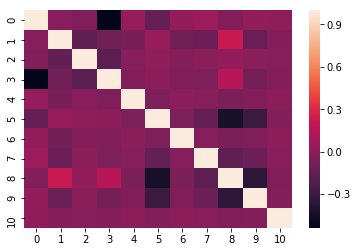

In [245]:
sns.heatmap(pd.DataFrame(X_train).corr())

# MODELING

### Linear regression

In [246]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)

print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X_test, y_test).score(X_test, y_test)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X_test, y_test, cv=10))

 
 
predicted = regr.predict(X_test) 

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, y_train))
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5) )  

With 20% Holdout: 0.4999125553902347
Testing on Sample: 0.5003162151737954

[0.51051795 0.46892997 0.52198952 0.482296   0.53417181 0.48781113
 0.47434833 0.51397988 0.49058435 0.49348236]

Coefficients: 
 [ 0.14499286  0.07212846 -0.03126459 -0.14451278 -0.03540346 -0.08647434
 -0.0456981  -0.0460469   0.11297924 -0.10048745 -0.05020034]

Intercept: 
 13.758549222572697

R-squared:
0.5073167487098116
RMSE: 0.3355613208202374


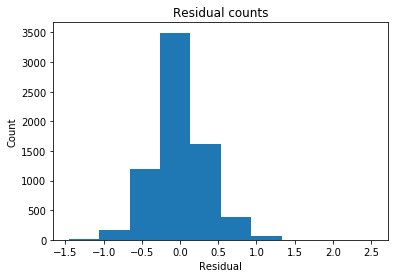

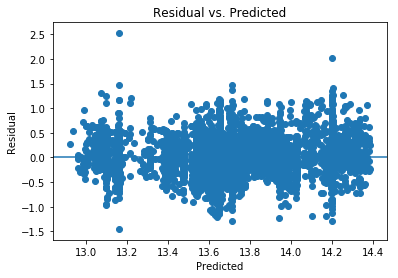

In [241]:
actual = y_test
# Calculate the error 
residual = actual - predicted

 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()



plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



In [242]:
# Tuning hyperparameters
param_grid = dict(normalize=[True,False],copy_X=[True,False])
grid = GridSearchCV(regr, param_grid, cv=5, scoring="r2", return_train_score=True)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'copy_X': True, 'normalize': True}
0.44596998023266243


In [243]:
# Instantiate and fit our model.
 
regr = linear_model.LinearRegression(copy_X=True, normalize=True) 
regr.fit(X_train,y_train)


print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit( X_test , y_test).score(X_test, y_test)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X_test, y_test, cv=10))
 
 
 
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, y_test))


With 20% Holdout: 0.4405259137865264
Testing on Sample: 0.4409702946774203

[0.4685391  0.39314067 0.46599459 0.42424361 0.46915496 0.40885639
 0.43259087 0.46867643 0.41814003 0.44111689]

Coefficients: 
 [ 0.05861847 -0.0534407  -0.22659243 -0.03563813 -0.11332885 -0.04517091
 -0.04822182  0.10424464 -0.11737535 -0.05259275]

Intercept: 
 13.755538481586257

R-squared:
0.4409702946774203


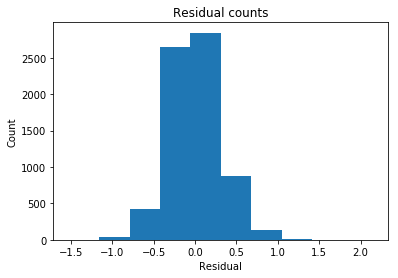

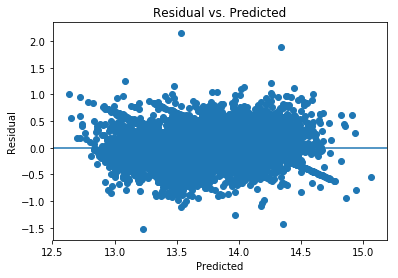

RMSE: 0.304426556237559


In [1064]:
predicted = regr.predict(X_test) 
actual = y_test
# Calculate the error 
residual = actual - predicted

 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()



plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5) )  
 

##### using PCA

In [247]:
# PCA
pca = PCA(n_components=6)
pca.fit(X_train)  
pca_data = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

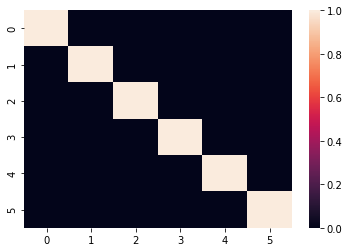

In [248]:
sns.heatmap(pd.DataFrame(pca_data).corr())

In [249]:
regr = linear_model.LinearRegression(copy_X=True, normalize=True) 
regr.fit(pca_data,y_train)


print('With 20% Holdout: ' + str(regr.fit(pca_data, y_train).score(pca_test, y_test)))
print('Testing on Sample: ' + str(regr.fit( pca_test , y_test).score(pca_test, y_test)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, pca_test, y_test, cv=10))
 
 
 
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(pca_test, y_test))


With 20% Holdout: 0.47032171417218405
Testing on Sample: 0.47060274567616256

[0.48022936 0.43376649 0.47312953 0.46552463 0.51271433 0.46279563
 0.44505281 0.48702185 0.46212297 0.46278176]

Coefficients: 
 [ 0.04319173  0.24279938  0.11787566 -0.01611479 -0.01135269 -0.02331937]

Intercept: 
 13.75757562049697

R-squared:
0.47060274567616256


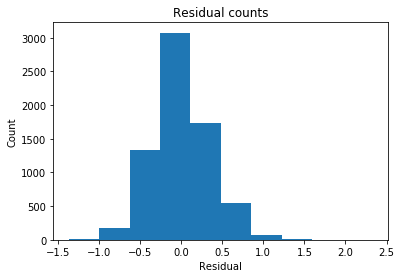

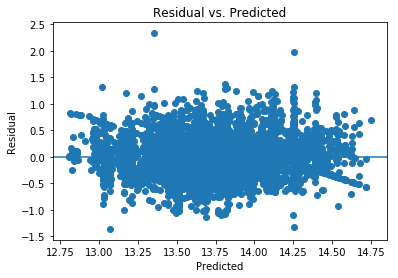

RMSE: 0.3453942547040254


In [250]:
predicted = regr.predict(pca_test) 
actual = y_test
# Calculate the error 
residual = actual - predicted

 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()



plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5) )  

 ### KNN regression
 

In [251]:
from sklearn import neighbors
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10) 
knn.fit(X_train, y_train)


print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(knn, X_test, y_test, cv=10))

 

With 20% Holdout: 0.5160288129860024
Testing on Sample: 0.5582304289627227

[0.49870243 0.50604966 0.57005124 0.48968157 0.54098414 0.48689433
 0.44692797 0.5307246  0.48639678 0.51044744]


In [938]:
param_grid = dict(leaf_size=range(1,30),p=(1,2),n_neighbors=range(1,12),weights=['distance','uniform'])
grid = GridSearchCV(knn, param_grid, cv=3, scoring="r2", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'leaf_size': 2, 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.5557303956873648


In [212]:
#fit with new parameters
knn = neighbors.KNeighborsRegressor(n_neighbors=5,p=1,leaf_size=30,weights='distance') 
knn.fit(X_train, y_train)


print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(knn, X_test, y_test, cv=10))

predicted = knn.predict(X_test) 
actual = y_test
# Calculate the error 
residual = actual - predicted
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5) )  

With 20% Holdout: 0.5899460034816693
Testing on Sample: 0.7934869187163714

[0.56117552 0.55945558 0.60149311 0.48687149 0.57262989 0.59452611
 0.4742281  0.54929946 0.55811338 0.5018107 ]
RMSE: 0.21572379426189564


### Decision Trees

In [252]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression tree model
regr_t = DecisionTreeRegressor(max_depth=2,random_state=20) 
regr_t.fit(X_train, y_train)


print('With 20% Holdout: ' + str(regr_t.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr_t.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(regr_t, X_test, y_test, cv=10))

 

With 20% Holdout: 0.3758587067192959
Testing on Sample: 0.37603732497980435

[0.39357096 0.34924295 0.41186814 0.36521764 0.36954308 0.2496233
 0.29552411 0.40056361 0.34923287 0.37734889]


In [253]:
param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(6,20),max_features=['sqrt',4])
grid = GridSearchCV(regr_t, param_grid, cv=3, scoring="r2", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

KeyboardInterrupt: 

In [254]:
regr_t = DecisionTreeRegressor( max_depth=10, max_leaf_nodes=10,random_state=20) 
regr_t.fit(X_train, y_train)


print('With 20% Holdout: ' + str(regr_t.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr_t.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(regr_t, X_test, y_test, cv=10))

 

With 20% Holdout: 0.45571380955603163
Testing on Sample: 0.45779778184672715

[0.46188322 0.42763835 0.48915723 0.45324232 0.4592523  0.42962175
 0.41466032 0.47838864 0.41126568 0.45301719]


### Random forrest

In [927]:
from sklearn import ensemble
rfrg = ensemble.RandomForestRegressor(criterion='mse',random_state=20, max_features='sqrt') 
rfrg.fit(X_train,y_train)


print('With 20% Holdout: ' + str(rfrg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfrg.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(rfrg, X_test, y_test, cv=10))



c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


With 20% Holdout: 0.4630545863815074
Testing on Sample: 0.8415312019692502

[0.49298406 0.41444452 0.43143736 0.22157351 0.43442458 0.49036564
 0.32024489 0.45640187 0.43739103 0.41558481]


In [928]:
param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(6,20),max_features=['sqrt',4,'auto'])
grid = GridSearchCV(rfrg, param_grid, cv=3, scoring="r2", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': 19}
0.4490852048192025


In [959]:
rfrg = ensemble.RandomForestRegressor(criterion='mse',random_state=20, max_features=None, max_leaf_nodes=100,max_depth=1000) 
rfrg.fit(X_train,y_train)


print('With 20% Holdout: ' + str(rfrg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfrg.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(rfrg, X_test, y_test, cv=10))



c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


With 20% Holdout: 0.5563552822045224
Testing on Sample: 0.6238238660300586

[0.52341536 0.56362732 0.56816115 0.49937074 0.56366554 0.54234622
 0.49896707 0.54242927 0.54482112 0.56535095]


### Support Vector Machine

In [958]:
from sklearn.svm import SVR

# Instantiate our model and fit the data.
svm = SVR(kernel = 'linear')
svm.fit(X_train, y_train)


print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(svm, X_test, y_test, cv=10))


With 20% Holdout: 0.40042768079193947
Testing on Sample: 0.40086002062809867

[0.36679613 0.41435023 0.41337795 0.35421187 0.41111305 0.41559802
 0.35996673 0.3902737  0.40142793 0.45351605]


In [118]:
param_grid = dict(C=np.arange(.1,5,.1))
grid = GridSearchCV(svm, param_grid, cv=3, scoring="r2", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'C': 4.9}
0.9526951607751275


In [119]:
# Instantiate our model and fit the data.
svm = SVR(kernel = 'linear',C=4.9)
svm.fit(X_train, y_train)


print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(svm, X_test, y_test, cv=10))


With 20% Holdout: 0.915790459685434
Testing on Sample: 0.9162286726723479

[0.88492361 0.75870494 0.94242741 0.93320671 0.71957495 0.94967856
 0.94639005 0.8860337  0.94326342 0.90686347]


### Gradient boost

In [120]:
from sklearn import ensemble 
 
# Initialize and fit the model.
clf = ensemble.GradientBoostingRegressor(n_estimators=500,max_depth=2,
                                          loss='ls', random_state=20) 
clf.fit(X_train, y_train)


print('With 20% Holdout: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(clf.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(clf, X_test, y_test, cv=10))


With 20% Holdout: 0.9105717434210875
Testing on Sample: 0.9516127827743578

[0.89644295 0.68232086 0.85937645 0.90877854 0.67540924 0.95114301
 0.91034673 0.88175259 0.94415856 0.84690803]


In [124]:
param_grid = dict(n_estimators=np.arange(600,1000,100),max_depth=range(1,4),
                  loss=['ls', 'lad', 'huber', 'quantile'],learning_rate=np.arange(.1,2,.1))
grid = GridSearchCV(clf, param_grid, cv=3, scoring="r2", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.6, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 800}
0.9464071078315028


In [125]:
# Initialize and fit the model.
clf = ensemble.GradientBoostingRegressor(loss='ls', max_depth=1, n_estimators=800,random_state=20,learning_rate=.6) 
clf.fit(X_train, y_train)


print('With 20% Holdout: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(clf.fit( X_test , y_test).score(X_test, y_test)))
print() 
print(cross_val_score(clf, X_test, y_test, cv=10))



With 20% Holdout: 0.9058566332630565
Testing on Sample: 0.94102506475775

[0.87553183 0.68462308 0.88221494 0.92292342 0.67940062 0.92260155
 0.92402442 0.88865156 0.92613838 0.84197668]
